---
---
## Importacion de datos, librerías y configuraciones.

In [23]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from config import *

df_clientes = pd.read_pickle(f"{DATOS_RUTA_TRATADOS}/info_clientes.pkl")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
---
## Clustering Clientes

In [24]:
df_clientes.sample(3)

,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders
201,Darrin Sayre,Home Office,Managua,Managua,Nicaragua,LATAM,Central,13280.81,252,1487.67,0.18,16.68,68
129,Carlos Soltero,Consumer,Haninge,Stockholm,Sweden,EU,North,14937.04,221,-1000.08,0.25,21.12,68
25,Allen Goldenen,Consumer,Wollongong,New South Wales,Australia,APAC,Oceania,8926.12,178,447.26,0.20,17.48,53


#### Encodeamos

In [25]:
df_clientes_copia = df_clientes.copy()

In [26]:
clus_prep = sup_clus.Preprocesado(df_clientes_copia)

In [27]:
encoded_df_cli = clus_prep.codificar()
encoded_df_cli.sample()

,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders
716,0.00,0.30,0.00,0.03,0.08,0.22,0.21,25668.49,383,2794.73,0.10,22.30,106


#### Estandarizamos

In [28]:
escalador = sup_fea.RobustScaler()

standardized_df_cli = escalador.fit_transform(encoded_df_cli)
standardized_df_cli = pd.DataFrame(standardized_df_cli, columns=df_clientes.columns, index=df_clientes.index)
standardized_df_cli.sample(3)

,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders
689,0.00,-1.53,0.33,0.43,-0.08,0.59,-0.29,-1.09,-1.07,-0.47,1.54,-0.99,-0.95
249,0.00,-1.00,1.00,0.00,-0.55,0.59,-0.29,-0.89,-0.50,-0.19,0.18,-0.57,-0.79
53,0.00,-1.00,0.00,3.71,-0.10,0.00,0.00,-0.04,0.09,-0.43,-0.15,-0.69,-0.21


---
---
## DBSCAN Clustering

In [29]:
clustering = sup_clus.Clustering(standardized_df_cli)

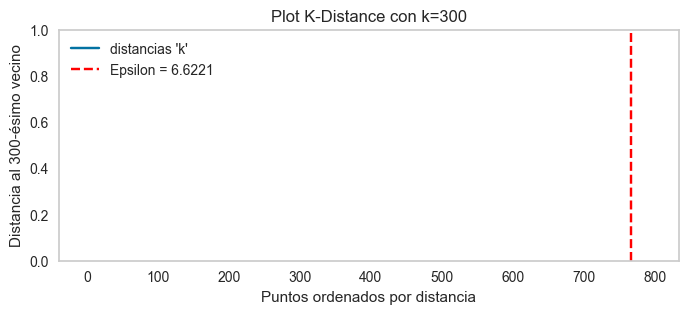

In [30]:
epsilon = clustering.plot_epsilon(standardized_df_cli, 300, (8,3), (0,1))

In [31]:
df_dbscan = clustering.modelo_dbscan(standardized_df_cli, eps_values=[5, 10, 20, 30, 40, 48.1, 55], min_samples_values=[50, 100, 150, 200, 300])

Iterando sobre eps y min_samples: 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


,eps,min_samples,silhouette_score,davies_bouldin_score,cardinality
0,5,50,0.57,0.55,"{-1: 27, 0: 768}"
1,5,100,0.57,0.55,"{-1: 27, 0: 768}"
2,5,150,0.57,0.55,"{-1: 27, 0: 768}"
3,5,200,0.57,0.55,"{-1: 27, 0: 768}"
4,5,300,0.57,0.55,"{-1: 27, 0: 768}"


Mejor modelo: eps=5, min_samples=50, silhouette_score=0.5684
Se han generado 2 clusters (incluyendo outliers, si los hay).


<h2 style="color: red">como no me convencen las cardinalidades que nos da el dbscan, pasamos al KMEANS</h2>

---
---
## KMEANS Clustering

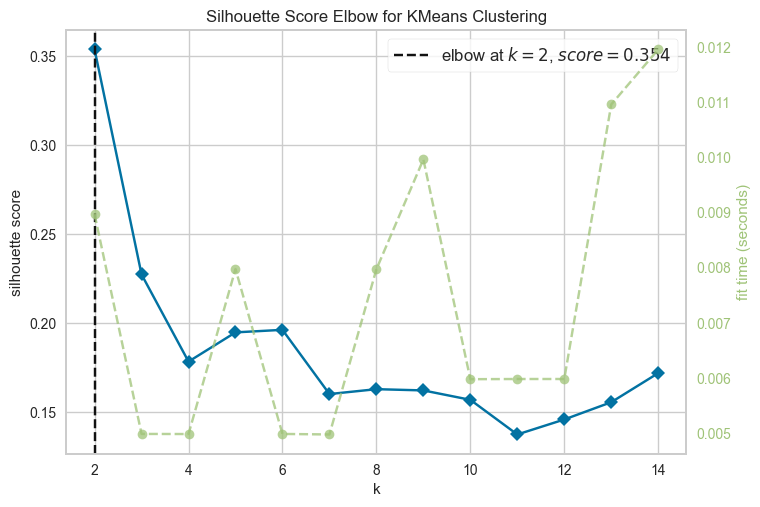

In [32]:
clustering = sup_clus.Clustering(standardized_df_cli)

clustering.sacar_clusters_kmeans()

In [33]:
clustering.calcular_confs_vinculacion_distancia_aglomerativo(standardized_df_cli)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric

,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
21,ward,euclidean,0.30,1.21,"{0: 631, 1: 137, 2: 27}",3
0,complete,euclidean,0.24,1.66,"{0: 210, 1: 27, 2: 558}",3
1,complete,euclidean,0.22,1.50,"{0: 558, 1: 27, 2: 129, 3: 81}",4
13,complete,cosine,0.21,2.06,"{0: 74, 1: 83, 2: 63, 3: 186, 4: 72, 5: 81, 6:...",9
22,ward,euclidean,0.21,1.31,"{0: 513, 1: 137, 2: 27, 3: 118}",4
2,complete,euclidean,0.21,1.43,"{0: 129, 1: 27, 2: 436, 3: 81, 4: 122}",5
3,complete,euclidean,0.21,1.56,"{0: 436, 1: 27, 2: 112, 3: 81, 4: 122, 5: 17}",6
12,complete,cosine,0.20,2.06,"{0: 126, 1: 83, 2: 63, 3: 186, 4: 72, 5: 81, 6...",8
14,complete,chebyshev,0.19,1.25,"{0: 757, 1: 11, 2: 27}",3
26,ward,euclidean,0.18,1.64,"{0: 232, 1: 86, 2: 202, 3: 118, 4: 27, 5: 27, ...",8


In [34]:
kmeans = KMeans(n_clusters=4)
km_fit = kmeans.fit(standardized_df_cli)
labels = km_fit.labels_
df_kmeans = standardized_df_cli.copy()
df_kmeans["cluster"] = labels
df_kmeans.reset_index(inplace=True)
df_kmeans.sample(5)

,index,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders,clusters_dbscan,cluster
150,273,0.00,0.00,0.33,-0.29,-0.08,0.00,2.42,0.13,-0.38,0.68,1.34,0.75,0.00,0,2
577,53,0.00,-1.00,0.00,3.71,-0.10,0.00,0.00,-0.04,0.09,-0.43,-0.15,-0.69,-0.21,0,1
539,315,0.00,-1.00,0.00,-0.43,0.10,0.59,-0.58,0.02,0.50,-0.33,0.21,1.05,0.53,0,0
392,376,0.00,-1.00,3.33,2.57,0.55,0.59,0.32,0.71,0.78,0.01,-0.18,0.76,1.05,0,1
649,30,0.00,0.00,0.67,-0.29,-0.42,-0.41,2.42,-0.93,-1.16,-0.66,-0.80,-0.02,-1.32,0,2


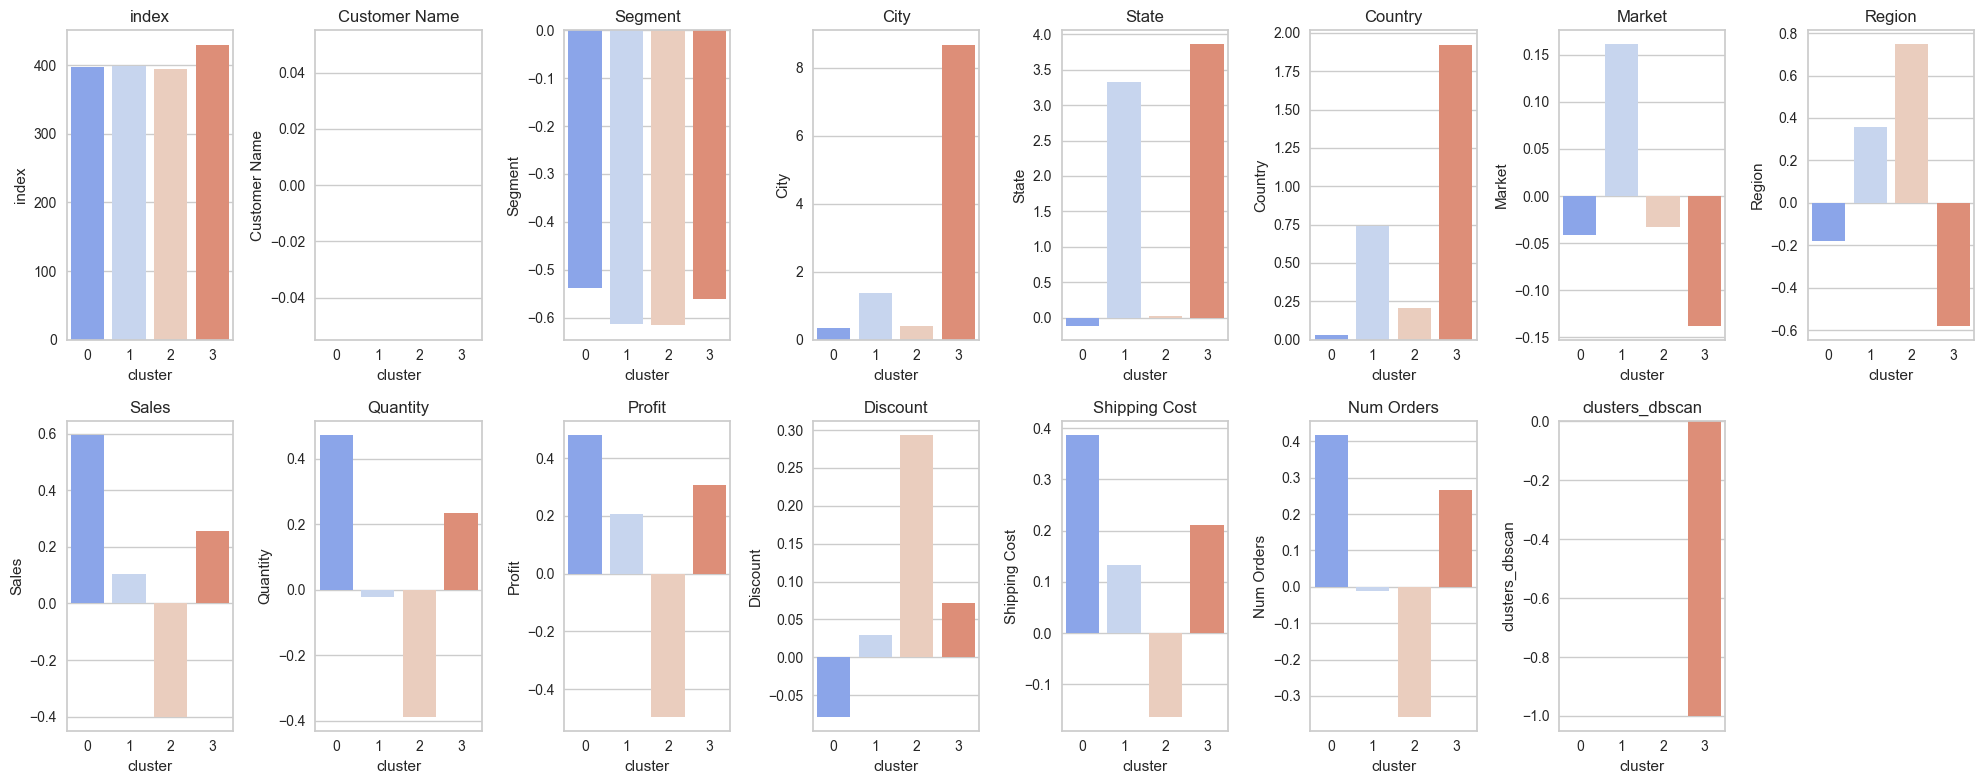

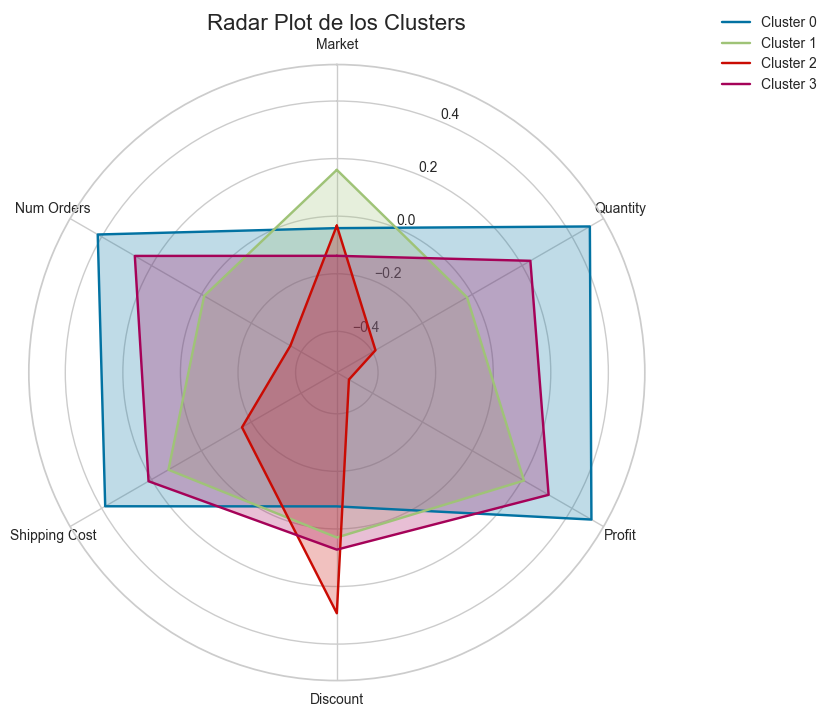

In [35]:
clustering.plot_clusters(df_kmeans, 'cluster')
clustering.visualizar_radar_plot(df_kmeans, 'cluster', ['Market', 'Quantity', 'Profit', 'Discount', 'Shipping Cost', 'Num Orders'])

In [36]:
df_kmeans_copia = df_kmeans.copy()

df_kmeans_copia[df_clientes.columns] = df_clientes[df_clientes.columns]
df_kmeans_copia.sample(3)

,index,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders,clusters_dbscan,cluster
736,524,Ted Butterfield,Consumer,Vincennes,Ile-de-France,France,EU,Central,16026.85,326,1559.27,0.09,20.11,76,0,1
228,1,Denny Ordway,Consumer,Srinagar,Jammu and Kashmir,India,APAC,Central Asia,18796.62,252,4137.64,0.12,19.09,83,0,0
417,711,Karen Daniels,Consumer,Yonkers,New York,United States,US,East,24017.33,246,2890.69,0.13,40.16,64,0,0


In [37]:
df_kmeans_copia.columns

Index(['index', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Sales', 'Quantity', 'Profit', 'Discount',
       'Shipping Cost', 'Num Orders', 'clusters_dbscan', 'cluster'],
      dtype='object')

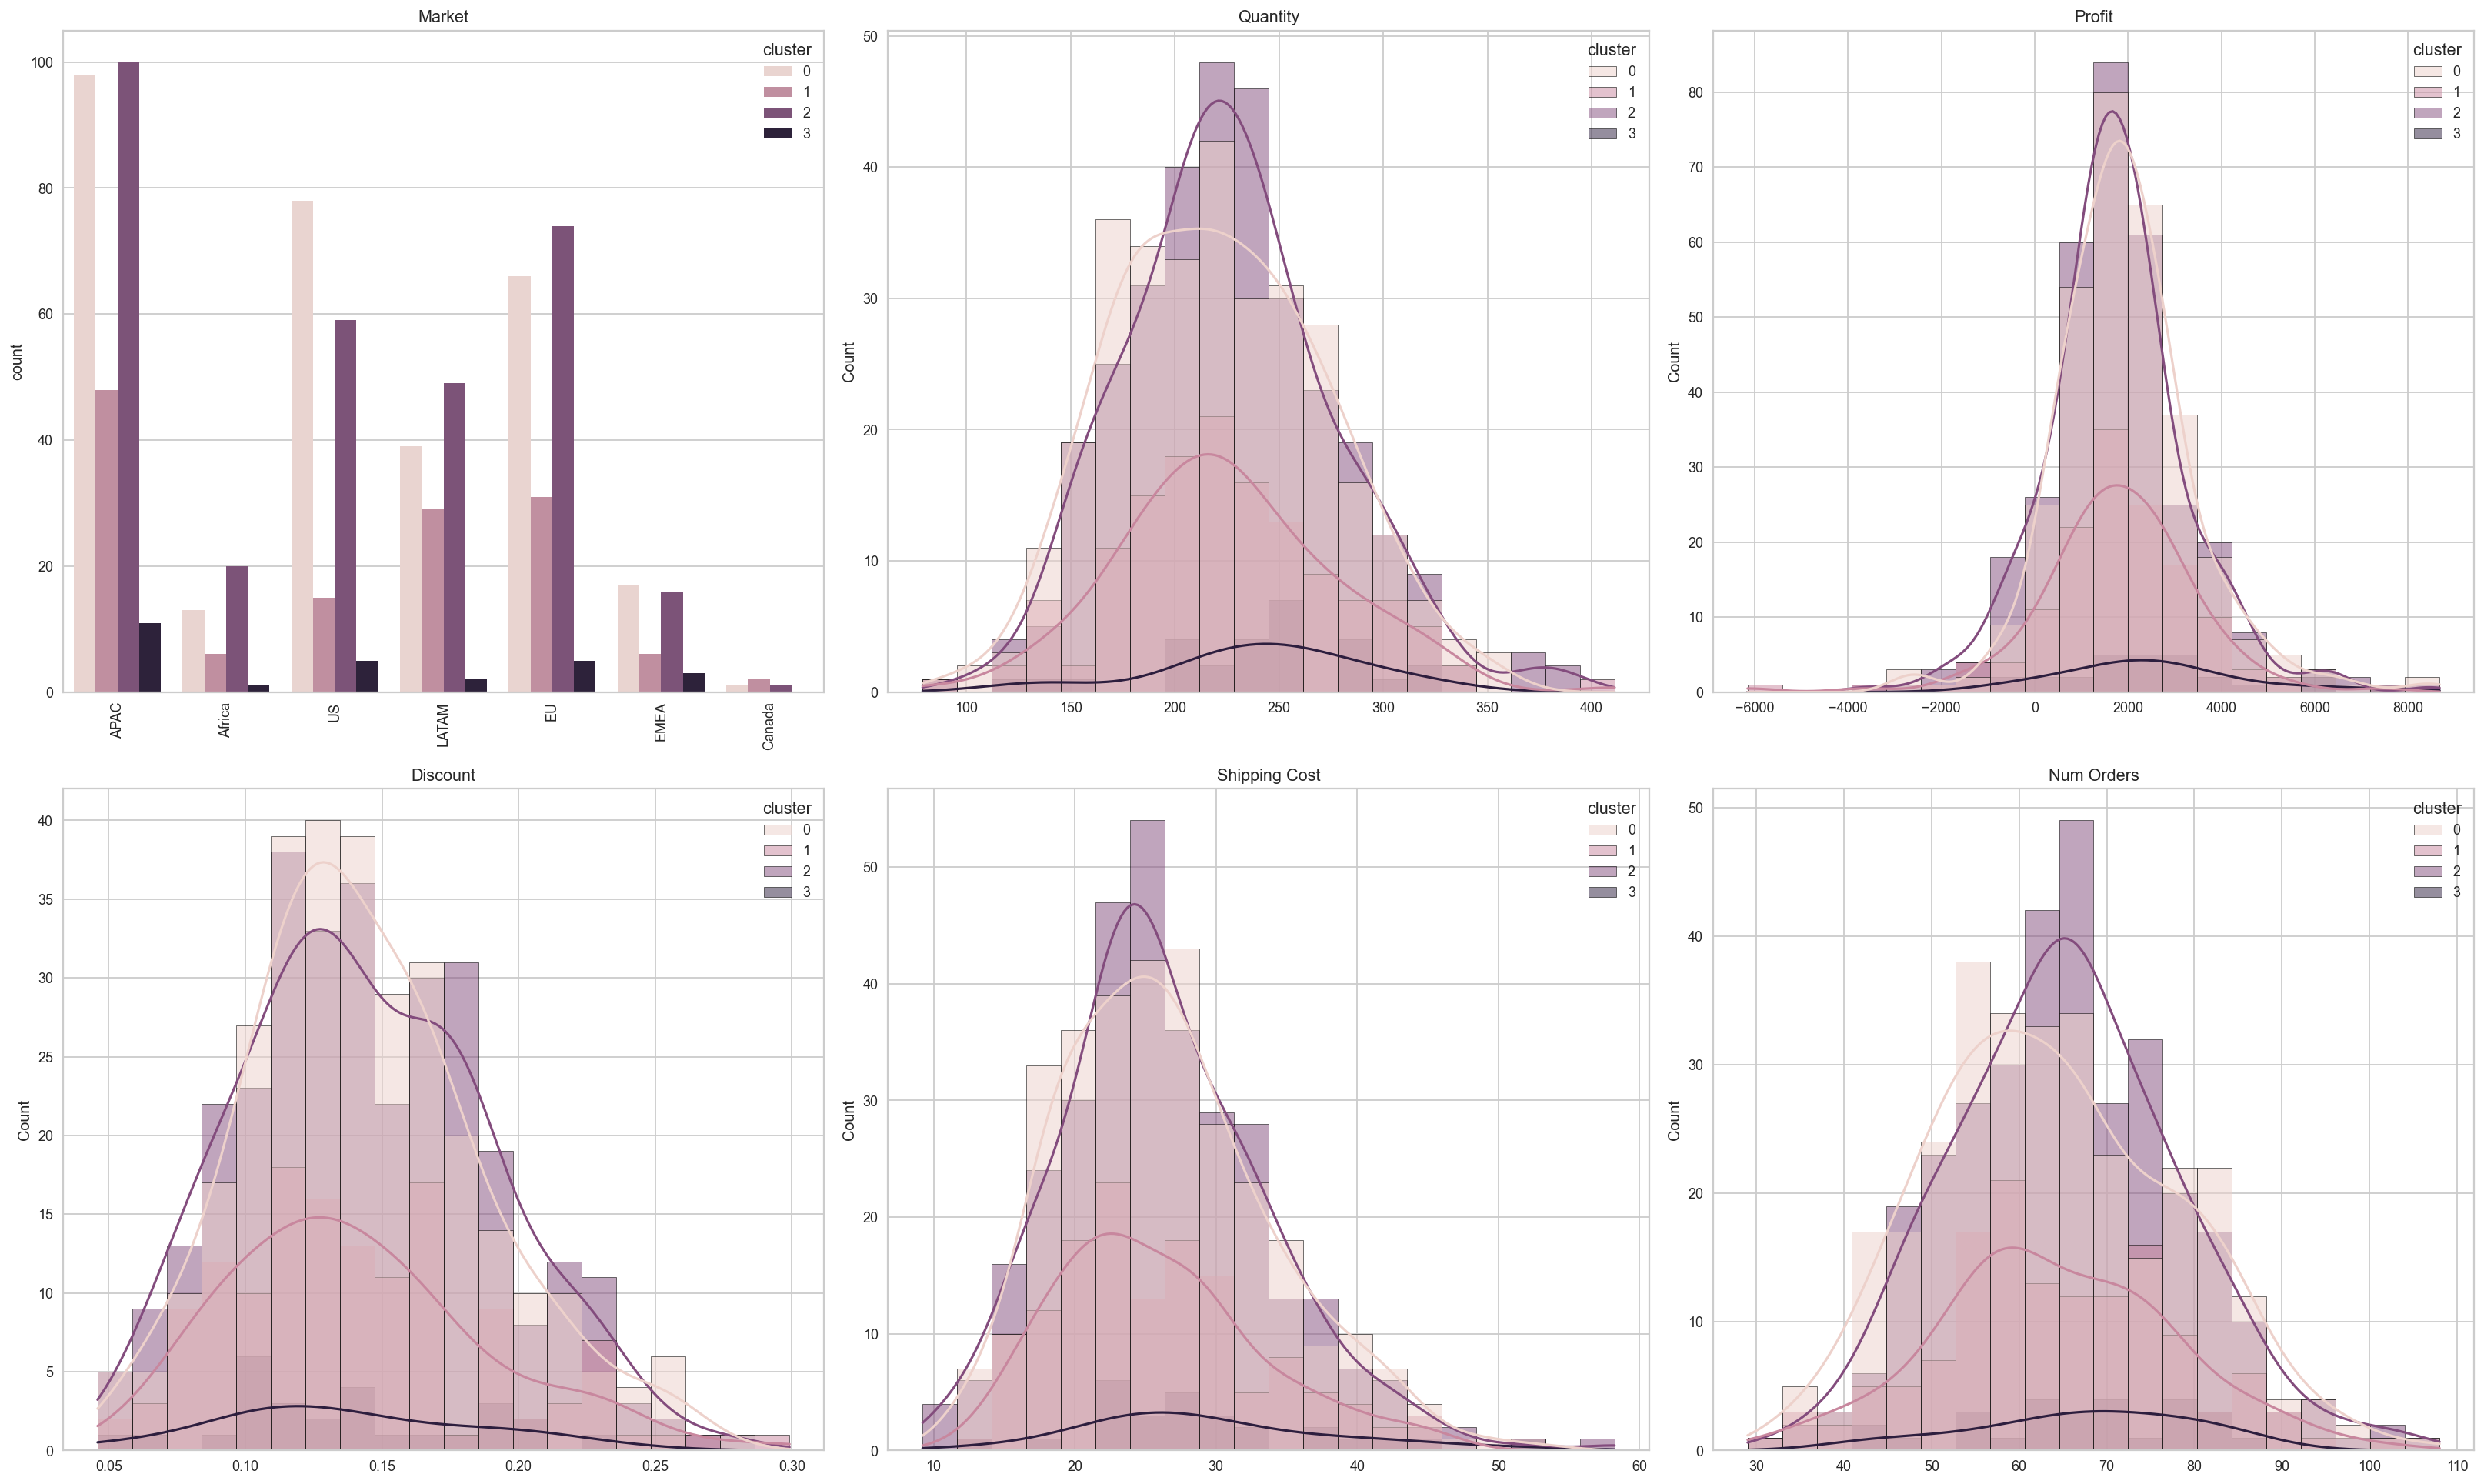

In [38]:
clustering.plot_completo_clusters(data=df_kmeans_copia, x=['Market', 'Quantity', 'Profit', 'Discount', 'Shipping Cost', 'Num Orders'], hue='cluster')

---
---
## Conclusiones Clusters

- **Cluster 0**: Representa a los clientes **problemáticos** con bajos beneficios y altos descuentos.
- **Cluster 1**: Clientes activos, pero con margen moderado.  
- **Cluster 2**: Claramente el más **rentable** y activo en **ventas y pedidos**.
- **Cluster 3**: Clientes de **bajo volumen**, pero con rentabilidad controlada.

<br>

| **Cluster** | **Descripción**                                | **Características Clave**                                                                                                                                     | **Interpretación**                                                                                             |
|-------------|-----------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Cluster 0** | Clientes con **baja rentabilidad** y alta dependencia de descuentos. | - **Profit** bajo o negativo.<br>- **Altos descuentos**.<br>- **Bajo Quantity y Sales**.<br>- **Moderado Shipping Cost**.                                     | Clientes que compran poco, exigen descuentos elevados y generan pérdidas. **Clientes problemáticos.**         |
| **Cluster 1** | Clientes **activos** con rentabilidad media.   | - **Moderado Profit y Sales**.<br>- **Cantidad y Num Orders** altos.<br>- Descuentos y Shipping Cost moderados.<br>- Buena presencia en mercados clave.     | Clientes con **actividad constante** y rentabilidad aceptable. Se pueden optimizar para mejorar beneficios.   |
| **Cluster 2** | Clientes **altamente rentables** y de alto volumen. | - **Profit, Sales y Quantity** muy altos.<br>- **Bajos descuentos**.<br>- **Shipping Cost controlado**.<br>- **Mayor actividad en Num Orders**.               | Clientes **top**, generan altas ventas con rentabilidad elevada. Deberían ser **priorizados** y fidelizados.  |
| **Cluster 3** | Clientes con **actividad limitada**, pero estables. | - **Profit y Sales** bajos pero positivos.<br>- **Num Orders y Quantity** limitados.<br>- **Shipping Cost controlado**.<br>- Descuentos bajos.                | Clientes con bajo volumen de compra pero **positivos en rentabilidad**. Pueden mejorarse con incentivos.       |

---

### **2. Análisis Detallado por Cluster**
#### **Cluster 0: Clientes Problemáticos**
- **Métricas Clave**:
   - **Profit**: Bajo o negativo, indicando pérdidas.
   - **Descuentos**: Elevados, lo que afecta la rentabilidad.
   - **Quantity y Sales**: Bajos, reflejando una baja actividad.
- **Interpretación**:
   - Estos clientes son **no rentables** y exigen altos descuentos para comprar.
- **Recomendaciones**:
   - Reducir o eliminar descuentos.
   - Evaluar si estos clientes aportan valor a largo plazo.

---

#### **Cluster 1: Clientes Activos y Moderados**
- **Métricas Clave**:
   - **Profit y Sales**: Moderados.
   - **Num Orders y Quantity**: Altos, reflejando una **actividad constante**.
   - **Shipping Cost**: Moderado.
- **Interpretación**:
   - Son clientes **activos** pero con rentabilidad media.
- **Recomendaciones**:
   - Optimizar costos de envío.
   - Incentivar compras adicionales para aumentar **Profit**.

---

#### **Cluster 2: Clientes Top**
- **Métricas Clave**:
   - **Profit y Sales**: Altos, siendo el **mejor cluster** en rendimiento.
   - **Quantity y Num Orders**: Muy altos.
   - **Descuentos**: Bajos, lo que aumenta el margen.
   - **Shipping Cost**: Controlado.
- **Interpretación**:
   - Son los clientes **más valiosos** del conjunto de datos.
- **Recomendaciones**:
   - Priorizar y fidelizar con estrategias de retención.
   - Ofrecer programas de **recompensa** para mantener su lealtad.

---

#### **Cluster 3: Clientes Moderados con Bajo Volumen**
- **Métricas Clave**:
   - **Profit y Sales**: Positivos pero bajos.
   - **Quantity y Num Orders**: Limitados.
   - **Shipping Cost**: Controlado.
   - **Descuentos**: Bajos.
- **Interpretación**:
   - Son clientes **estables** pero con bajo volumen de compras.
- **Recomendaciones**:
   - Implementar estrategias de **cross-selling** para incrementar ventas.
   - Incentivar su actividad con ofertas puntuales y programas de fidelización.

---


---
---
## Agrupamos clusters en dataframes

In [39]:
df_kmeans_copia['cluster'].value_counts()

cluster
2    319
0    312
1    137
3     27
Name: count, dtype: int64

In [40]:
df_cluster_clientes_0 = df_kmeans_copia[df_kmeans_copia['cluster'] == 0]
df_cluster_clientes_0.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_clientes_1 = df_kmeans_copia[df_kmeans_copia['cluster'] == 1]
df_cluster_clientes_1.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_clientes_2 = df_kmeans_copia[df_kmeans_copia['cluster'] == 2]
df_cluster_clientes_2.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_clientes_3 = df_kmeans_copia[df_kmeans_copia['cluster'] == 3]
df_cluster_clientes_3.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_kmeans_copia.drop(columns=['clusters_dbscan'], inplace=True)

---
---
## Guardamos los datos (clusters generados)

In [41]:
df_cluster_clientes_0.to_pickle(f"{DATOS_RUTA_CLUSTERS}/clientes/cluster0_clientes.pkl")
df_cluster_clientes_1.to_pickle(f"{DATOS_RUTA_CLUSTERS}/clientes/cluster1_clientes.pkl")
df_cluster_clientes_2.to_pickle(f"{DATOS_RUTA_CLUSTERS}/clientes/cluster2_clientes.pkl")
df_cluster_clientes_3.to_pickle(f"{DATOS_RUTA_CLUSTERS}/clientes/cluster3_clientes.pkl")

df_kmeans_copia.to_pickle(f"{DATOS_RUTA_TRATADOS}/clustered_info_clientes.pkl")